# Ejercicios Modulo 2. Librerías Especializadas (Soluciones)

Consideraciones a tener en cuenta: 

* Guardar este documento con el siguiente formato para su entrega: __M2U4_01_nombre_apellido1_apellido2__
* Realizar los ejercicios con las herramientas vistas en las sesiones. 
* Comentar el código
* Utilizar nombres de variables apropiados, si vais a guardar una nota, llamar a esa variable nota, no n o x

## Ejercicio sobre Pandas

* Carga los datos de __articulos_leidos.csv__ con Pandas
* Al cargar los datos, los nombres de las columnas deben ser: __'my_datetime', 'event', 'country', 'user_id', 'source', 'topic'__ (no vale cambiarlo en el CSV)
* Mostrar los primeros 10 registros
* Mostrar los últimos 10 registros
* Mostrar 5 registros aleatorios a modo de muestra
* Mostrar únicamente dos columnas del dataframe (en este orden): __country__ y __user_id__
* Mostrar los datos del dataframe cuyo __source = SEO__
* Mostrar los 5 primeros registros (únicamente con las columnas user_id, topic y country) que coincidan con que __country = country_2__
* Agrupar por source y realizar un conteo de elementos
* Agrupar por source, filtrar por la columna user_id para que sea la única que aparezca y realizar un conteo de elementos
* Mostrar los datos del dataframe que coincidan con que __country = country_2__. A este resultado, realizar una __agrupación por source y topic__ (por ambos, y en ese orden) y finalmente un conteo del resultado. A continuación se muestra el resultado que debe aparecer:
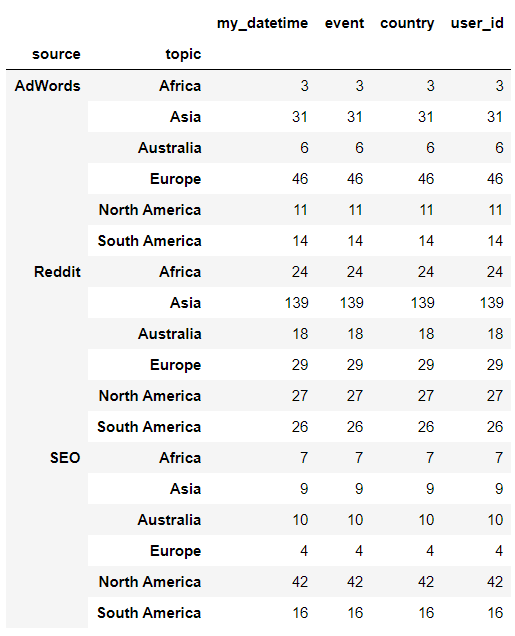
* Igual que el anterior pero cambiando el orden de las columnas por las que agrupamos, es decir, en este caso, __agrupar por topic y source__. A continuación se muestra el resultado que debe aparecer:

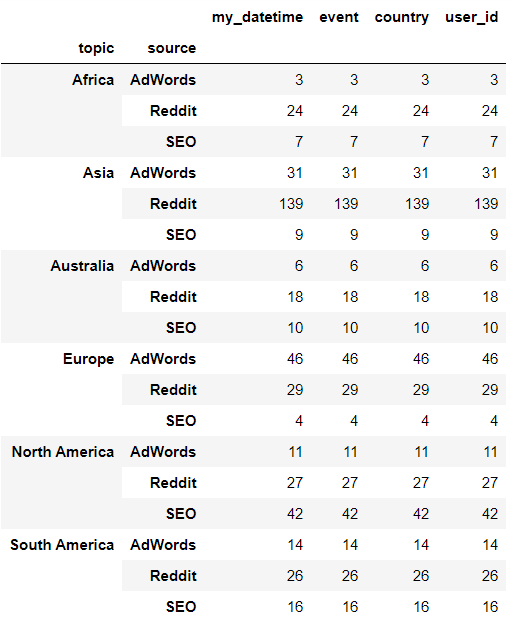
* Cargar el csv __articulos_comprados.csv__ con los nombres de columna __'my_date_time', 'event', 'user_id', 'amount'__
* __Fusiona los dos dataframes__ en un dataframe final que se llame __fusion__. Esta fusión se debe realizar adecuadamente para que aparezcan en la fusión los registros que aparecen en articulos_leidos.csv pero que no tienen correspondencia en articulos_comprados.csv. Y no deben aparecer los registros que si aparecen en articulos_comprados.csv pero no tienen correspondencia en articulos_leidos.csv
* Cambiar los __NaN por 0__
* __Agrupar por country__ y realizar el sumatorio
* Eliminar la columna user_id para quedarnos únicamente con __amount__
* __Ordenar__ los valores de mayor a menor
* Mostrar los __3__ primeros registros

In [ ]:
import pandas as pd

articulos_leidos = pd.read_csv("articulos_leidos.csv", sep=";")

articulos_leidos.columns = ['my_datetime', 'event', 'country', 'user_id', 'source', 'topic']

# Mostrar el número de columnas
print("Número de columnas:")
print(len(articulos_leidos.columns))
print("--------------------------------------------------------------------------------------------")

# Mostrar los 10 primeros registros
print("10 primeros registros:")
print(articulos_leidos.head(10))
print("--------------------------------------------------------------------------------------------")

# Mostrar los últimos 10 registros
print("Últimos 10 registros:")
print(articulos_leidos.tail(10))
print("--------------------------------------------------------------------------------------------")

# Mostrar 5 registros aleatorios
print("5 registros aleatorios:")
print(articulos_leidos.sample(5))
print("--------------------------------------------------------------------------------------------")

# Mostrar sólo las columnas 'country' y 'user_id'
print("Mostrar sólo las columnas country y user_id:")
print(articulos_leidos[["country", "user_id"]])
print("--------------------------------------------------------------------------------------------")

# Filtrar los registros donde source = 'SEO'
print("Las columnas donde source = SEO:")
soloSEO = articulos_leidos[articulos_leidos["source"] == "SEO"]
print(soloSEO)
print("--------------------------------------------------------------------------------------------")

# Filtrar los registros donde country = 'country_2' y mostrar los primeros 5 con columnas específicas
print("5 primeros registros (únicamente con las columnas user_id, topic y country) que coincidan con que country = country_2:")
country_2 = articulos_leidos[articulos_leidos["country"] == "country_2"]
resultado = country_2[['user_id', 'topic', 'country']].head(5)
print(resultado)
print("--------------------------------------------------------------------------------------------")

# Agrupar por 'source' y contar elementos
print("Agrupar por source y realizar un conteo de elementos:")
agrupacion = articulos_leidos.groupby("source").size()
print(agrupacion)
print("--------------------------------------------------------------------------------------------")

# Agrupar por 'source', filtrar por 'user_id' para obtener la cantidad de usuarios únicos por 'source'
print("Agrupar por source, filtrar por la columna user_id para que sea la única que aparezca y realizar un conteo de elementos:")
agrupacion_id = articulos_leidos.groupby("source")["user_id"].nunique()
print(agrupacion_id)
print("--------------------------------------------------------------------------------------------")

# Filtrar los datos por 'country_2', agrupar por 'source' y 'topic', contar los elementos y fusionar con el dataframe original
print("Mostrar los datos del dataframe que coincidan con que country = country_2. A este resultado, realizar una agrupación por source y topic (por ambos, y en ese orden) y finalmente un conteo del resultado:")
country_2 = articulos_leidos[articulos_leidos["country"] == "country_2"]
agrupacion = country_2.groupby(["source", "topic"]).size().reset_index(name='count')
merge_df = pd.merge(country_2, agrupacion, on=["source", "topic"], how="left")
print(merge_df)
print("--------------------------------------------------------------------------------------------")

# Filtrar los datos por 'country_2', agrupar por 'topic' y 'source', contar los elementos y fusionar con el dataframe original
print("Igual que el anterior pero cambiando el orden de las columnas por las que agrupamos, es decir, en este caso, agrupar por topic y source:")
agrupacion = country_2.groupby(["topic", "source"]).size().reset_index(name='count')
merge_df = pd.merge(country_2, agrupacion, on=["topic", "source"], how="left")
print(merge_df)




In [32]:
import pandas as pd

articulos_comprados = pd.read_csv("articulos_comprados.csv", sep=";")
articulos_comprados.columns = ['my_date_time', 'event', 'user_id', 'amount']

articulos_leidos = pd.read_csv("articulos_leidos.csv", sep=";")
articulos_leidos.columns = ['my_datetime', 'event', 'country', 'user_id', 'source', 'topic']

#'source' y 'topic' en ambos DataFrames
if 'source' not in articulos_comprados.columns:
    articulos_comprados['source'] = ''
if 'topic' not in articulos_comprados.columns:
    articulos_comprados['topic'] = ''

# Verifica si 'user_id' está presente en ambos DataFrames
print("¿'user_id' en articulos_comprados?", 'user_id' in articulos_comprados.columns)
print("¿'user_id' en articulos_leidos?", 'user_id' in articulos_leidos.columns)

# Si 'user_id' no es el mismo tipo de dato en ambos DataFrames, convertimos a string
articulos_comprados['user_id'] = articulos_comprados['user_id'].astype(str)
articulos_leidos['user_id'] = articulos_leidos['user_id'].astype(str)

# fusión
fusion = pd.merge(articulos_comprados, articulos_leidos, on=["user_id", "source", "topic"], how="left", indicator=True)

# Filtrar para obtener solo los registros de articulos_comprados que no están en articulos_leidos
fusion = fusion[fusion["_merge"] == "left_only"]

# Eliminar la columna '_merge'
fusion = fusion.drop(columns=["_merge"])

# Asegurarse de que los tipos de objeto sean inferidos, para evitar warning
fusion = fusion.infer_objects()
# Reemplaza los NaN por 0
fusion = fusion.fillna(0)
# Ver los resultados
print(fusion)

# Agrupar por pais y realizar el sumatorio
print("sumatorio agrupado por country:")
agrupacion = fusion.groupby("country").sum()
print(agrupacion)

# Eliminar la columna 'user_id'
fusion = fusion.drop(columns=['user_id'])
print(fusion)

# Ordenar por 'amount' de mayor a menor
fusion = fusion.sort_values(by='amount', ascending=False)

# Mostrar los 3 primeros registros
print(fusion.head(3))

¿'user_id' en articulos_comprados? True
¿'user_id' en articulos_leidos? True
           my_date_time event_x     user_id  amount source topic  my_datetime  \
0   2018-01-01 09:28:00     buy  2458151933       8                       0.0   
1   2018-01-01 13:23:16     buy  2458152245       8                       0.0   
2   2018-01-01 14:20:43     buy  2458152315     100                       0.0   
3   2018-01-02 02:57:43     buy  2458153264       8                       0.0   
4   2018-01-02 05:25:38     buy  2458152579     100                       0.0   
..                  ...     ...         ...     ...    ...   ...          ...   
64  2018-01-07 18:44:58     buy  2458157339       8                       0.0   
65  2018-01-07 19:09:53     buy  2458157601       8                       0.0   
66  2018-01-07 20:24:35     buy  2458157193       8                       0.0   
67  2018-01-07 22:11:28     buy  2458157128       8                       0.0   
68  2018-01-07 23:58:19     buy 